## Compute Sagnac Frequency - Plotting

## Imports

In [1]:
import os
import matplotlib.pyplot as plt

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat
from obspy import UTCDateTime

## Configurations

In [10]:
config = {}


config['seed'] = "BW.DROMY..FJZ"

# config['tbeg'] = UTCDateTime("2022-04-24 00:00")
# config['tend'] = UTCDateTime("2022-06-12 00:00")

config['tbeg'] = UTCDateTime("2023-03-31 00:00")
config['tend'] = UTCDateTime("2023-04-02 00:00")

# config['datadir'] = "/export/data/sagnac_frequency/"
config['datadir'] = "~/kilauea-data/sagnac_frequency/"

## Load Data

In [12]:
def __load_data(config):
    
    t1 = date.fromisoformat(str(config['tbeg'].date))
    t2 = date.fromisoformat(str(config['tend'].date))

    df = DataFrame()
    for dat in date_range(t1,t2):
        file = str(dat)[:10].replace("-","")+".pkl"

        try:
            df0 = read_pickle(config['datapath']+file)
            df = concat([df, df0])
        except:
            print(f"error for {file}")
            
    return df

In [13]:
# config['datapath'] = config['datadir']+"hilbert_60_RU/"
config['datapath'] = config['datadir']
df1 = __load_data(config)

# config['datapath'] = config['datadir']+"hilbert_60_RU_multi/"
# df2 = __load_data(config)

## Plotting

In [16]:
# def __makeplot(df1, df2, label1="", label2=""):
    
#     def __smooth(y, box_pts):
#         from numpy import ones, convolve, hanning

# #         win = ones(box_pts)/box_pts
#         win = hanning(box_pts)
#         y_smooth = convolve(y, win/sum(win), mode='same')

#         return y_smooth
    
#     time_scaling, time_unit = 86400, "days"
    
#     ## ___________________
#     ##
    
#     fig, ax = plt.subplots(3,1, figsize=(15,10), sharex=True)
    
#     plt.subplots_adjust(hspace=0.05)
    
#     font = 13 
#     smooting = 60
#     cut_off = int(smooting/2)
    
#     ## DF1
#     ax[0].scatter(df1['times']/time_scaling, df1['freqs'], c="#3776ab", s=10, alpha=0.4, zorder=2, label=label1)
#     ax[0].plot(df1['times'][cut_off:-cut_off]/time_scaling, __smooth(df1['freqs'],smooting)[cut_off:-cut_off], "#3776ab", zorder=2)
    
#     ax[1].scatter(df1['times']/time_scaling, df1['hmhw'], c="#3776ab", s=10, alpha=0.4, zorder=2)
#     ax[1].plot(df1['times'][cut_off:-cut_off]/time_scaling, __smooth(df1['hmhw'],smooting)[cut_off:-cut_off], "#3776ab", alpha=0.7, zorder=2) 
    
#     ax[2].scatter(df1['times']/time_scaling, df1['psd_max'], c="#3776ab", s=10, alpha=0.4, zorder=2)
#     ax[2].plot(df1['times'][cut_off:-cut_off]/time_scaling, __smooth(df1['psd_max'],smooting)[cut_off:-cut_off], "#3776ab", alpha=0.7, zorder=2) 
#     ax[2].set_yscale("log")
    
#     ## DF2
#     ax[0].scatter(df2['times']/time_scaling, df2['freqs'], c="#f48512", s=10, alpha=0.4, zorder=2, label=label2)
#     ax[0].plot(df2['times'][cut_off:-cut_off]/time_scaling, __smooth(df2['freqs'],smooting)[cut_off:-cut_off], "k", zorder=2)

#     ax[1].scatter(df2['times']/time_scaling, df2['hmhw'], c="#f48512", s=10, alpha=0.4, zorder=2)
#     ax[1].plot(df2['times'][cut_off:-cut_off]/time_scaling, __smooth(df2['hmhw'],smooting)[cut_off:-cut_off], "#f48512", alpha=0.7, zorder=2) 
    
#     ax[2].scatter(df2['times']/time_scaling, df2['psd_max'], c="#f48512", s=10, alpha=0.4, zorder=2)
#     ax[2].plot(df2['times'][cut_off:-cut_off]/time_scaling, __smooth(df2['psd_max'],smooting)[cut_off:-cut_off], "#f48512", alpha=0.7, zorder=2) 
#     ax[2].set_yscale("log")

# #     ax[2].set_ylim(5e12, 2e14)
        
# #     ax[0].set_ylim(min(df1['freqs'][1:10]), max(df1['freqs'][1:10]))

# #     ax[0].set_ylim(553.4550, 553.4655)
    
    
#     ax[0].ticklabel_format(useOffset=False, style='plain')
    
#     ax[0].set_ylabel(r"Sagnac Beat (Hz)", fontsize=font)
#     ax[1].set_ylabel(r"PSD HMHW (Hz)", fontsize=font)
#     ax[2].set_ylabel(r"PSD$_{max}$ (V$^2$ / Hz)", fontsize=font)

#     ax[2].set_xlabel("Days since 2016-01-01", fontsize=font)
    
#     ax[0].set_title("ROMY-U Sagnac-Frequency", fontsize=font+2, pad=10)
#     ax[0].legend(loc=4)
    
#     for i in range(3):
#         ax[i].grid(zorder=0)
    
#     plt.show();

In [18]:
def __makeplot_mjd(df1, df2, label1="", label2=""):
    
    def __smooth(y, box_pts):
        from numpy import ones, convolve, hanning

#         win = ones(box_pts)/box_pts
        win = hanning(box_pts)
        y_smooth = convolve(y, win/sum(win), mode='same')

        return y_smooth
    
    time_scaling, time_unit = 86400, "days"
    
    ## ___________________
    ##
    
    fig, ax = plt.subplots(3,1, figsize=(15,10), sharex=True)
    
    plt.subplots_adjust(hspace=0.05)
    
    font = 13 
    smooting = 60
    cut_off = int(smooting/2)
    
    ## DF1
    ax[0].scatter(df1['times_mjd']/time_scaling, df1['freqs'], c="#3776ab", s=10, alpha=0.4, zorder=2, label=label1)
    ax[0].plot(df1['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df1['freqs'],smooting)[cut_off:-cut_off], "#3776ab", zorder=2)
    
    ax[1].scatter(df1['times_mjd']/time_scaling, df1['hmhw'], c="#3776ab", s=10, alpha=0.4, zorder=2)
    ax[1].plot(df1['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df1['hmhw'],smooting)[cut_off:-cut_off], "#3776ab", alpha=0.7, zorder=2) 
    
    ax[2].scatter(df1['times_mjd']/time_scaling, df1['psd_max'], c="#3776ab", s=10, alpha=0.4, zorder=2)
    ax[2].plot(df1['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df1['psd_max'],smooting)[cut_off:-cut_off], "#3776ab", alpha=0.7, zorder=2) 
    ax[2].set_yscale("log")
    
    ## DF2
    ax[0].scatter(df2['times_mjd']/time_scaling, df2['freqs'], c="#f48512", s=10, alpha=0.4, zorder=2, label=label2)
    ax[0].plot(df2['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df2['freqs'],smooting)[cut_off:-cut_off], "k", zorder=2)

    ax[1].scatter(df2['times_mjd']/time_scaling, df2['hmhw'], c="#f48512", s=10, alpha=0.4, zorder=2)
    ax[1].plot(df2['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df2['hmhw'],smooting)[cut_off:-cut_off], "#f48512", alpha=0.7, zorder=2) 
    
    ax[2].scatter(df2['times_mjd']/time_scaling, df2['psd_max'], c="#f48512", s=10, alpha=0.4, zorder=2)
    ax[2].plot(df2['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df2['psd_max'],smooting)[cut_off:-cut_off], "#f48512", alpha=0.7, zorder=2) 
    ax[2].set_yscale("log")

#     ax[2].set_ylim(5e12, 2e14)
        
#     ax[0].set_ylim(min(df1['freqs'][1:10]), max(df1['freqs'][1:10]))

#     ax[0].set_ylim(553.4550, 553.4655)
    
    
    ax[0].ticklabel_format(useOffset=False, style='plain')
    
    ax[0].set_ylabel(r"Sagnac Beat (Hz)", fontsize=font)
    ax[1].set_ylabel(r"PSD HMHW (Hz)", fontsize=font)
    ax[2].set_ylabel(r"PSD$_{max}$ (V$^2$ / Hz)", fontsize=font)

    ax[2].set_xlabel("Days since 2016-01-01", fontsize=font)
    
    ax[0].set_title("ROMY-U Sagnac-Frequency", fontsize=font+2, pad=10)
    ax[0].legend(loc=4)
    
    for i in range(3):
        ax[i].grid(zorder=0)
    
    plt.show();

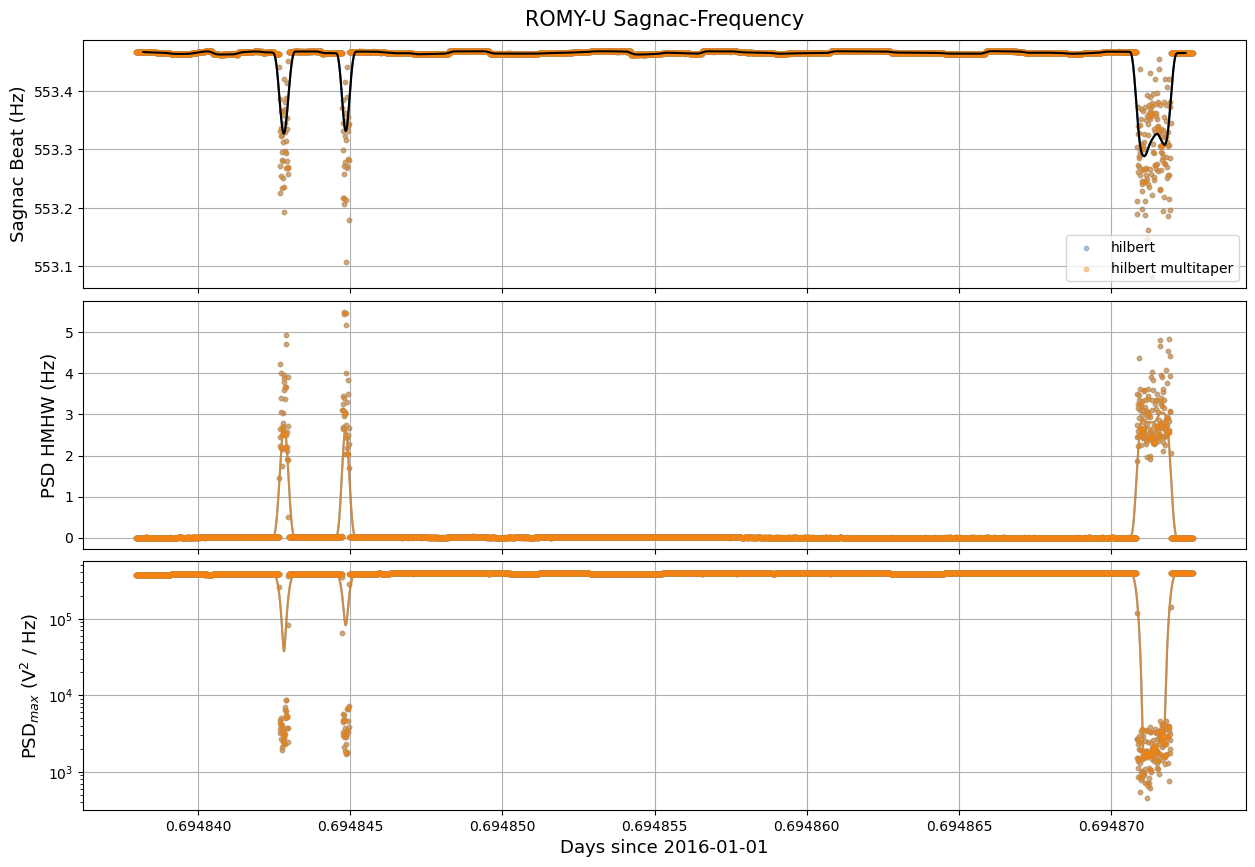

In [19]:
__makeplot_mjd(df1, df1, label1="hilbert", label2="hilbert multitaper")

### Single Plot RZ

In [21]:
config0 = {}

# config0['tbeg'] = UTCDateTime("2022-08-09 00:00")
# config0['tend'] = UTCDateTime("2022-09-30 00:00")

config0['tbeg'] = UTCDateTime("2023-03-31 00:00")
config0['tend'] = UTCDateTime("2023-04-02 00:00")

# config0['datadir'] = "/export/data/sagnac_frequency/"
config0['datadir'] = "~/kilauea-data/sagnac_frequency/"

# config0['datapath'] = config0['datadir']+"hilbert_60_RZ/"
config0['datapath'] = config0['datadir']

In [22]:
df0 = __load_data(config0)

df0 = df0[df0['freqs'] != 0]
df0['freqs'] = df0['freqs'].where(df0['hmhw'] < 0.05)

In [ ]:
# def __makeplot_single(config, df1, label1="data1"):
    
#     def __smooth(y, box_pts):
#         from numpy import ones, convolve, hanning

# #         win = ones(box_pts)/box_pts
#         win = hanning(box_pts)
#         y_smooth = convolve(y, win/sum(win), mode='same')

#         return y_smooth
    
#     time_scaling, time_unit = 86400, "days"
    
#     ## ___________________
#     ##
    
#     fig, ax = plt.subplots(3,1, figsize=(15,10), sharex=True)
    
#     plt.subplots_adjust(hspace=0.05)
    
#     font = 13 
#     smoothing = 30
#     cut_off = int(smoothing/2)
    
#     timeline = df1['times'] -df1['times'].iloc[0]
    
#     ## DF1
#     ax[0].scatter(timeline/time_scaling, df1['freqs'], c="#3776ab", s=5, alpha=0.4, zorder=2, label=label1)
#     ax[0].plot(timeline[cut_off:-cut_off]/time_scaling, __smooth(df1['freqs'],smoothing)[cut_off:-cut_off], "k", zorder=2, label=f"{smoothing} min average")
    
#     ax[1].scatter(timeline/time_scaling, df1['hmhw'], c="#3776ab", s=5, alpha=0.4, zorder=2)
# #     ax[1].plot(timeline[cut_off:-cut_off]/time_scaling, __smooth(df1['hmhw'],smoothing)[cut_off:-cut_off], "k", alpha=0.7, zorder=2) 
    
#     ax[2].scatter(timeline/time_scaling, df1['psd_max']/max(df1['psd_max']), c="#3776ab", s=5, alpha=0.4, zorder=2)
# #     ax[2].plot(timeline[cut_off:-cut_off]/time_scaling, __smooth(df1['psd_max'],smoothing)[cut_off:-cut_off], "k", alpha=0.7, zorder=2) 
    
    
#     ax[0].set_ylim(553.45, 553.47)
    
    
#     ax[1].set_yscale("log")
    
#     ax[0].ticklabel_format(useOffset=False, style='plain')
    
#     ax[0].set_ylabel(r"Sagnac Beat (Hz)", fontsize=font)
#     ax[1].set_ylabel(r"std. Dev. (Hz)", fontsize=font)
#     ax[2].set_ylabel(r"norm. Mean Envelope (a.u.)", fontsize=font)

#     ax[2].set_xlabel(f"Days from {config['tbeg'].date}", fontsize=font)
    
#     ax[0].set_title("ROMY-Z Sagnac-Frequency", fontsize=font+2, pad=10)
#     ax[0].legend(loc=1)
    
#     for i in range(3):
#         ax[i].grid(zorder=0, ls=":")
    
#     plt.show();

In [34]:
def __makeplot_single_mjd(config, df1, label1="data1"):
    
    def __smooth(y, box_pts):
        from numpy import ones, convolve, hanning

#         win = ones(box_pts)/box_pts
        win = hanning(box_pts)
        y_smooth = convolve(y, win/sum(win), mode='same')

        return y_smooth
    
    time_scaling, time_unit = 86400, "days"
    
    ## ___________________
    ##
    
    fig, ax = plt.subplots(3,1, figsize=(15,10), sharex=True)
    
    plt.subplots_adjust(hspace=0.05)
    
    font = 13 
    smoothing = 10 ## minutes
    cut_off = int(smoothing/2)
    
    timeline = df1['times_mjd'] -df1['times_mjd'].iloc[0]
    
    ## DF1
    ax[0].scatter(timeline/time_scaling, df1['freqs'], c="#3776ab", s=5, alpha=0.4, zorder=2, label=label1)
    ax[0].plot(timeline[cut_off:-cut_off]/time_scaling, __smooth(df1['freqs'],smoothing)[cut_off:-cut_off], "k", zorder=2, label=f"{smoothing} min average")
    
    ax[1].scatter(timeline/time_scaling, df1['hmhw'], c="#3776ab", s=5, alpha=0.4, zorder=2)
#     ax[1].plot(timeline[cut_off:-cut_off]/time_scaling, __smooth(df1['hmhw'],smoothing)[cut_off:-cut_off], "k", alpha=0.7, zorder=2) 
    
    ax[2].scatter(timeline/time_scaling, df1['psd_max']/max(df1['psd_max']), c="#3776ab", s=5, alpha=0.4, zorder=2)
#     ax[2].plot(timeline[cut_off:-cut_off]/time_scaling, __smooth(df1['psd_max'],smoothing)[cut_off:-cut_off], "k", alpha=0.7, zorder=2) 
    
    
#     ax[0].set_ylim(553.45, 553.47)
    
    
    ax[1].set_yscale("log")
    
    ax[0].ticklabel_format(useOffset=False, style='plain')
    
    ax[0].set_ylabel(r"Sagnac Beat (Hz)", fontsize=font)
    ax[1].set_ylabel(r"std. Dev. (Hz)", fontsize=font)
    ax[2].set_ylabel(r"norm. Mean Envelope (a.u.)", fontsize=font)

#     ax[2].set_xlabel(f"Days from {config['tbeg'].date}", fontsize=font)
    ax[2].set_xlabel(f"Days (MJD)", fontsize=font)
    
    ax[0].set_title("ROMY-Z Sagnac-Frequency", fontsize=font+2, pad=10)
    ax[0].legend(loc=1)
    
    for i in range(3):
        ax[i].grid(zorder=0, ls=":")
    
    plt.show();

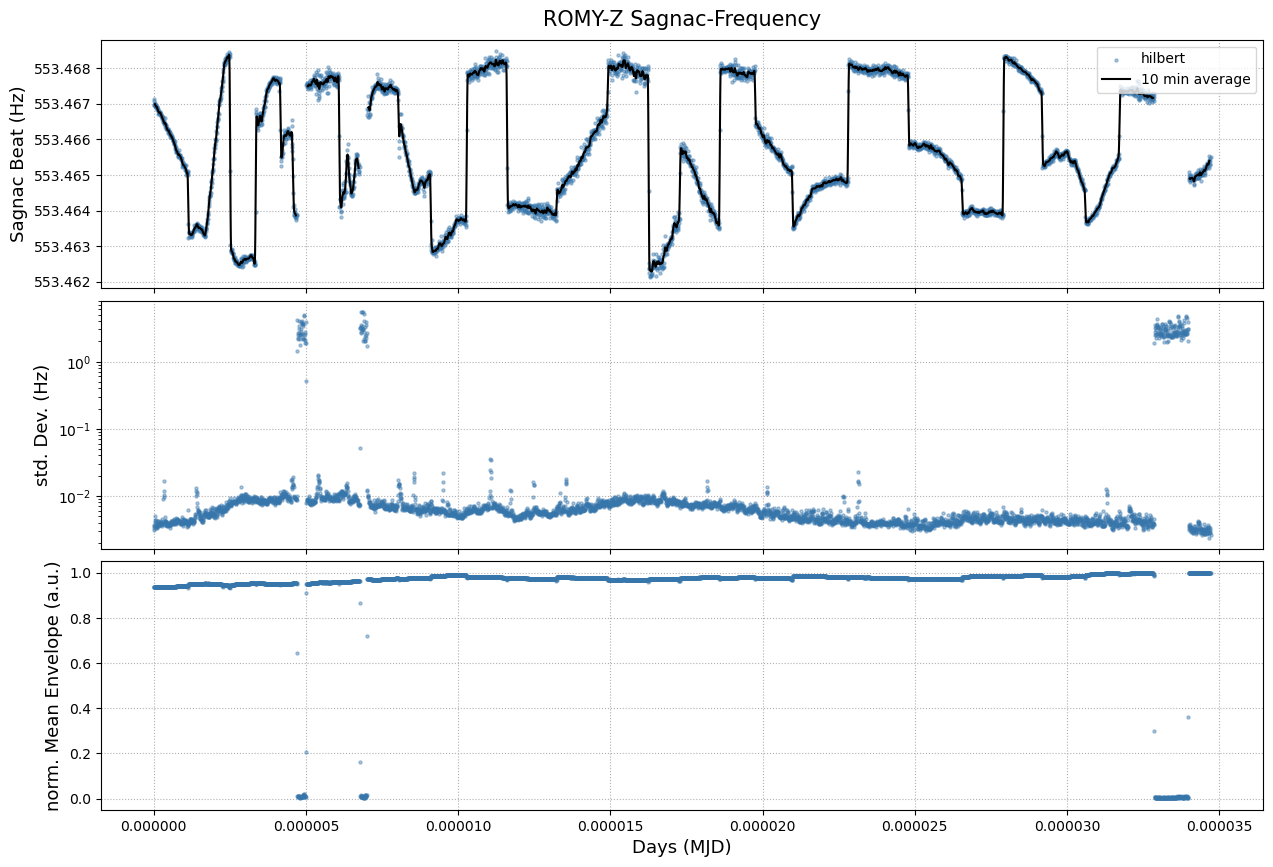

In [35]:
__makeplot_single_mjd(config0, df0, label1="hilbert")

### Single Plot RU

In [80]:
config0 = {}

config0['tbeg'] = UTCDateTime("2022-04-24 00:00")
config0['tend'] = UTCDateTime("2022-06-12 00:00")

config0['datadir'] = "/export/data/sagnac_frequency/"

config0['datapath'] = config0['datadir']+"hilbert_60_RU/"


config0['lower_limit'] = 301.5
config0['upper_limit'] = 302.5

df0 = __load_data(config0)



df0 = df0[df0['freqs'] != 0]
# df0['freqs'] = df0['freqs'].where(df0['hmhw'] < 0.05)

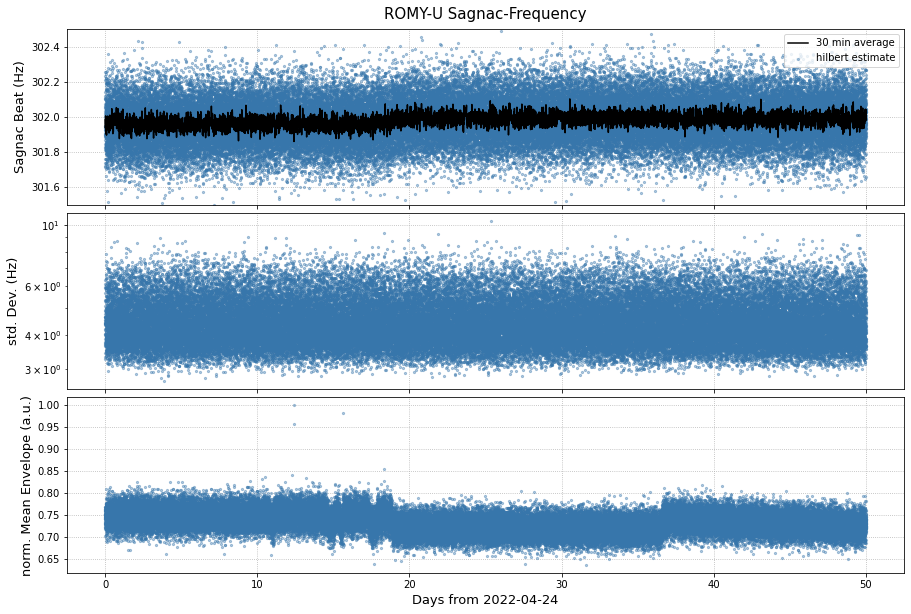

In [86]:
def __makeplot2(config, df1, label1="data1"):
    
    def __smooth(y, box_pts):
        from numpy import ones, convolve, hanning

#         win = ones(box_pts)/box_pts
        win = hanning(box_pts)
        y_smooth = convolve(y, win/sum(win), mode='same')

        return y_smooth
    
    time_scaling, time_unit = 86400, "days"
    
    ## ___________________
    ##
    
    fig, ax = plt.subplots(3,1, figsize=(15,10), sharex=True)
    
    plt.subplots_adjust(hspace=0.05)
    
    font = 13 
    smoothing = 30
    cut_off = int(smoothing/2)
    
    timeline = df1['times'] -df1['times'].iloc[0]
    
    ## DF1
    ax[0].scatter(timeline/time_scaling, df1['freqs'], c="#3776ab", s=5, alpha=0.4, zorder=2, label=label1)
    ax[0].plot(timeline[cut_off:-cut_off]/time_scaling, __smooth(df1['freqs'],smoothing)[cut_off:-cut_off], "k", zorder=2, label=f"{smoothing} min average")
    
    ax[1].scatter(timeline/time_scaling, df1['hmhw'], c="#3776ab", s=5, alpha=0.4, zorder=2)
#     ax[1].plot(timeline[cut_off:-cut_off]/time_scaling, __smooth(df1['hmhw'],smoothing)[cut_off:-cut_off], "k", alpha=0.7, zorder=2) 
    
    ax[2].scatter(timeline/time_scaling, df1['psd_max']/max(df1['psd_max']), c="#3776ab", s=5, alpha=0.4, zorder=2)
#     ax[2].plot(timeline[cut_off:-cut_off]/time_scaling, __smooth(df1['psd_max'],smoothing)[cut_off:-cut_off], "k", alpha=0.7, zorder=2) 
    
    
    ax[0].set_ylim(config['lower_limit'], config['upper_limit'])
    
    
    ax[1].set_yscale("log")
    
    ax[0].ticklabel_format(useOffset=False, style='plain')
    
    ax[0].set_ylabel(r"Sagnac Beat (Hz)", fontsize=font)
    ax[1].set_ylabel(r"std. Dev. (Hz)", fontsize=font)
    ax[2].set_ylabel(r"norm. Mean Envelope (a.u.)", fontsize=font)

    ax[2].set_xlabel(f"Days from {config['tbeg'].date}", fontsize=font)
    
    ax[0].set_title("ROMY-U Sagnac-Frequency", fontsize=font+2, pad=10)
    ax[0].legend(loc=1)
    
    for i in range(3):
        ax[i].grid(zorder=0, ls=":")
    
    plt.show();
    
__makeplot2(config0, df0, label1="hilbert estimate")